In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ar121\OneDrive\Рабочий стол\SUAI Labs\5 семестр\Введение в анализ данных\auto2.csv", sep = ',')
df.columns = df.columns.str.lower() 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   sellingprice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


In [3]:
df['sellingprice'] = df['sellingprice'].astype('Int64')
df['kmdriven'] = df['kmdriven'].astype('Int64')
df.describe()

,year,sellingprice,kmdriven
count,4344.000000,4342.0,4343.0
mean,2013.092311,503998.740903,66193.06332
std,4.214543,578446.459724,46636.648764
min,1992.000000,20000.0,1.0
25%,2011.000000,210000.0,35000.0
50%,2014.000000,350000.0,60000.0
75%,2016.000000,600000.0,90000.0
max,2020.000000,8900000.0,806599.0


**Задание 1**

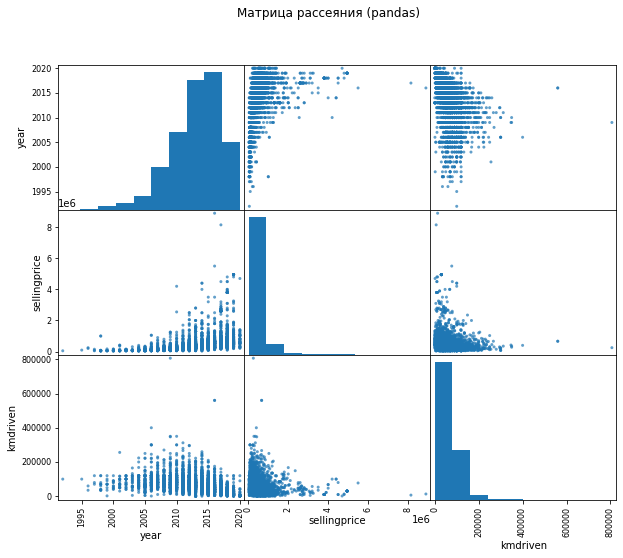

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
numeric_cols = ['year', 'sellingprice', 'kmdriven']
scatter_matrix(df[numeric_cols], figsize=(10, 8), alpha=0.7, diagonal='hist')
plt.suptitle("Матрица рассеяния (pandas)")
plt.show()

1. Матрица диаграмм рассеяния (диагоняль)<br>
На диаграмме видны три числовых признака: year, sellingprice, kmdriven.<br>
a) Гистограмма year (по диагонали) <br>
Распределение смещено вправо — большинство автомобилей выпущены в период 2010–2020 гг. <br>
Очень мало машин до 2000 года — рынок ориентирован на относительно новые авто. <br>
Средний год выпуска — около 2015–2018. <br>
b) Гистограмма sellingprice <br>
Ярко выраженная правосмещённость: подавляющее большинство автомобилей стоит до 2 млн, но есть длинный хвост до 8–9 млн. <br>
Пик плотности — около 1–2 млн — это «средний» сегмент. <br>
Средняя цена — примерно 2–3 млн, но из-за выбросов (дорогие авто) среднее выше медианы. <br>
c) Гистограмма kmdriven <br>
Распределение также правосмещённое: большинство авто имеют пробег до 150 000 км, пик — около 50–100 000 км. <br>
Есть небольшая группа с пробегом > 500 000 км — редкие случаи (возможно, такси или коммерческий транспорт).<br>
Средний пробег — около 70–100 000 км.<br>

2. Диаграммы рассеяния (вне диагонали)<br>
d) year vs sellingprice<br>
Чёткая положительная связь: чем новее автомобиль — тем выше его цена.<br>
Точки концентрируются в нижней части для старых авто и в верхней — для новых.<br>
Например, машины 2005 года — в основном до 1 млн, а 2020 года — от 3 млн и выше.<br>
Средняя цена по годам растёт линейно — это одна из самых сильных зависимостей в наборе.<br>
e) kmdriven vs sellingprice<br>
Чёткая отрицательная связь: чем больше пробег — тем ниже цена.<br>
При пробеге < 50 000 км — цены в диапазоне 2–6 млн, при пробеге > 200 000 км — цены резко падают до 0.5–1.5 млн.<br>
Есть небольшое количество дорогих авто с высоким пробегом — возможно, премиум-класс или коллекционные модели.<br>
Средняя цена снижается с увеличением пробега, но не линейно — спад более резкий на первых 100 000 км.<br>
f) year vs kmdriven<br>
Слабая отрицательная связь: старые авто в среднем имеют больший пробег.<br>
Однако наблюдается много исключений: например, машины 2005 года с пробегом 10 000 км — возможно, редкие/коллекционные.<br>
В целом, средний пробег для автомобилей 2005 года — ~100 000–150 000 км, для 2020 года — ~20 000–50 000 км.<br>

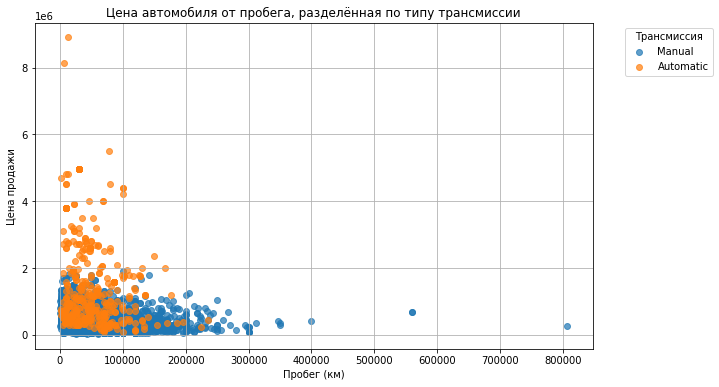

In [5]:
import matplotlib.pyplot as plt
categories = df['transmission'].unique()

plt.figure(figsize=(10, 6))

for cat in categories:
    subset = df[df['transmission'] == cat]
    plt.scatter(subset['kmdriven'], subset['sellingprice'], label=cat, alpha=0.7)

plt.title('Цена автомобиля от пробега, разделённая по типу трансмиссии')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена продажи')
plt.legend(title='Трансмиссия', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Цена от пробега, разделённая по типу трансмиссии<br>
На графике:<br>
Ось X — пробег (kmdriven),<br>
Ось Y — цена (sellingprice),<br>
Цвет — тип коробки передач (transmission): синий — Manual, оранжевый — Automatic.<br>
a) Общая картина<br>
Большинство точек — в области низкого пробега (<150 000 км) и средней цены (1–4 млн).<br>
С ростом пробега — цены снижаются, но не равномерно.<br>
b) Разница по типу трансмиссии<br>
Automatic (оранжевые точки) — в среднем выше по цене, чем Manual, при одинаковом пробеге.<br>
Например, при пробеге 50 000 км:<br>
Manual — ~2–3 млн,<br>
Automatic — ~3–5 млн.<br>
Это говорит о том, что автоматическая коробка передач добавляет премию в цене — даже если пробег одинаковый.<br>
При очень высоком пробеге (>300 000 км) разница между типами трансмиссии практически исчезает — все машины дешёвые.<br>
c) Выбросы<br>
Несколько оранжевых точек (Automatic) находятся в верхней части графика — это дорогие автомобили с низким пробегом (премиум-сегмент).<br>
Несколько синих точек (Manual) с высокой ценой — возможно, редкие спортивные или классические модели.<br>


**Задание 2**

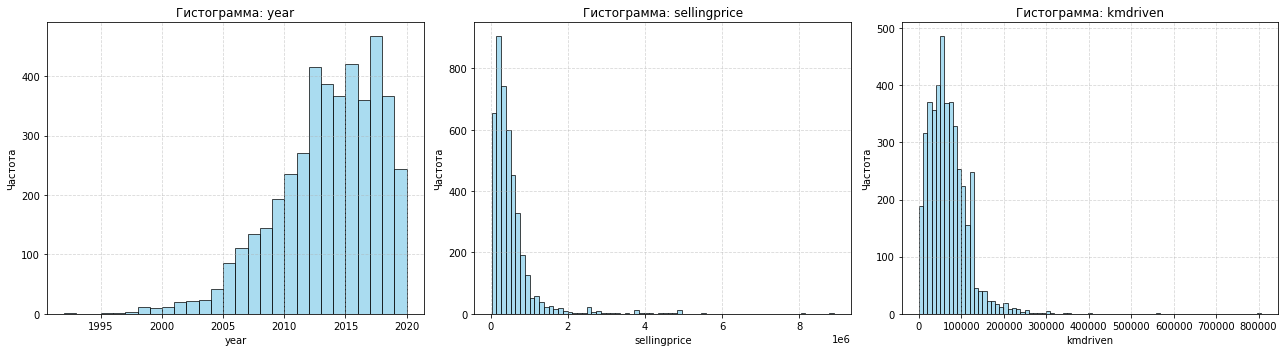

In [17]:
numeric_cols = ['year', 'sellingprice', 'kmdriven']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    df[col].hist(bins='scott', ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Гистограмма: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

1. Год выпуска автомобиля показывает правосмещённое распределение с пиком в диапазоне 2015–2020 гг.

- Мало автомобилей до 2005 года — рынок ориентирован на относительно новые авто.
- Пик частоты — около 2018 года (более 400 автомобилей).
- Средний год выпуска — ~2015–2017.

Вывод:  
Подавляющее большинство подержанных автомобилей на рынке — выпущенные за последние 10 лет. Это соответствует спросу на современные и надёжные машины.

2. Цена имеет резко правосмещённое распределение:

- Основная масса автомобилей — в диапазоне до 2 млн.
- Пик плотности — около 0.5–1 млн.
- Есть длинный хвост до 8–9 млн — это премиум-сегмент, редкие модели.
- Очень мало машин в ценовом диапазоне 3–6 млн — возможно, "провал" между средним и премиум-классом.

Вывод:  
Рынок подержанных авто доминирует сегмент низкой и средней стоимости. Дорогие авто встречаются редко — их доля не превышает 5%.  
Распределение не нормальное — при построении моделей стоит использовать логарифмическую трансформацию.

3. Пробег также имеет правосмещённое распределение:

- Большинство автомобилей — с пробегом до 150 000 км.
- Пик — около 50 000–100 000 км (более 800 автомобилей).
- Очень мало машин с пробегом > 300 000 км — это редкость (возможно, коммерческий транспорт или такси).
- Небольшая группа с пробегом < 10 000 км — возможно, "новые подержанные" или коллекционные.

Вывод:  
Типичный пробег подержанного авто — умеренный (50–150 тыс. км).  
Высокий пробег (>300 тыс.) встречается крайне редко — такие авто обычно продаются по минимальной цене.

**Задание 3**

In [7]:
numeric_df = df[['year', 'sellingprice', 'kmdriven']]

cov_matrix = numeric_df.cov()
print("Ковариационная матрица:")
print(cov_matrix)

print("\n" + "="*50 + "\n")

corr_matrix = numeric_df.corr()
print("Корреляционная матрица (Пирсон):")
print(corr_matrix)

Ковариационная матрица:
                      year  sellingprice      kmdriven
year          1.776237e+01  1.008626e+06 -8.253915e+04
sellingprice  1.008626e+06  3.346003e+11 -5.183319e+09
kmdriven     -8.253915e+04 -5.183319e+09  2.174977e+09


Корреляционная матрица (Пирсон):
                  year  sellingprice  kmdriven
year          1.000000      0.413701 -0.419913
sellingprice  0.413701      1.000000 -0.192139
kmdriven     -0.419913     -0.192139  1.000000


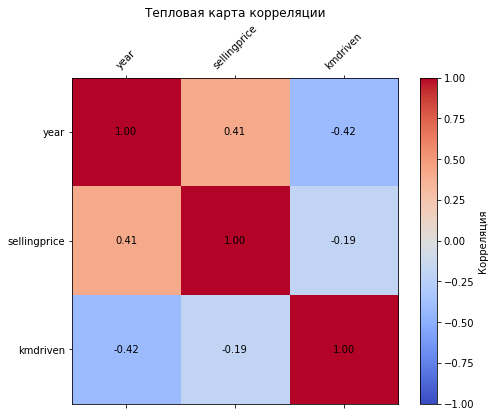

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, label='Корреляция')

# Подписи осей
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)

# Добавить значения в ячейки
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Тепловая карта корреляции')
plt.show()

Вывод  
1. Между всеми парами числовых признаков присутствует линейная зависимость, хотя и разной силы.  
2. Самая сильная связь — между годом выпуска и пробегом (r ≈ –0.42).  
3. Слабейшая — между ценой и пробегом (r ≈ –0.19), что может указывать на то, что пробег — не главный фактор ценообразования (в отличие от года).  

**Индивидуальное задание 1**

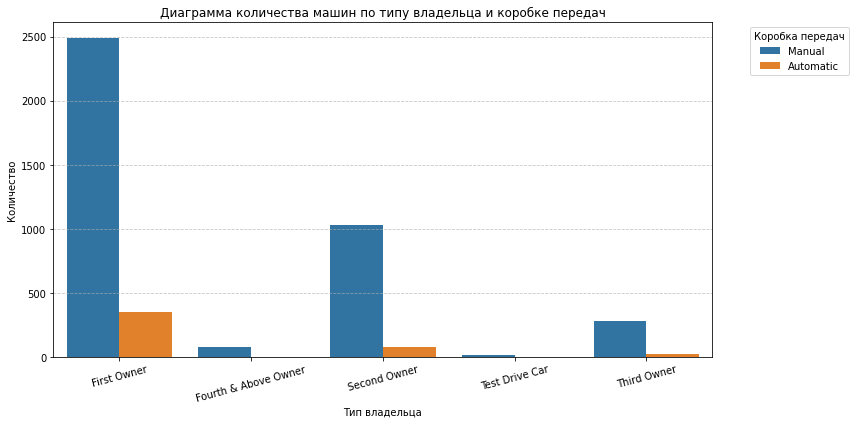

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

owner_order = ['First Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    x='owner',
    hue='transmission',
    palette=['#1f77b4', '#ff7f0e'], 
    order=owner_order
)

plt.title('Диаграмма количества машин по типу владельца и коробке передач')
plt.xlabel('Тип владельца')
plt.ylabel('Количество')
plt.legend(title='Коробка передач', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

На диаграмме представлено распределение количества автомобилей по типу владельца (owner) с разбивкой по типу коробки передач (transmission). Видно, что подавляющее большинство автомобилей принадлежит первым владельцам, при этом преобладают машины с механической коробкой передач. Доля автомобилей с автоматической трансмиссией среди первых владельцев значительно меньше, но всё же заметна.

С ростом числа предыдущих владельцев общее количество автомобилей снижается. У вторых и третьих владельцев также преобладают автомобили с механической коробкой, однако доля автоматических моделей в этих группах ещё ниже. Категория «Fourth & Above Owner» представлена минимальным количеством автомобилей, в основном с механической коробкой. Категория «Test Drive Car» содержит незначительное число машин, преимущественно с механической трансмиссией.

Таким образом, на рынке подержанных автомобилей наблюдается устойчивая тенденция: чем больше предыдущих владельцев — тем меньше вероятность встретить автомобиль с автоматической коробкой передач. Механическая коробка остаётся доминирующей во всех категориях, особенно среди первых владельцев, где её доля составляет более 80% от общего числа автомобилей в этой группе.

**Индивидуальное задание 2**

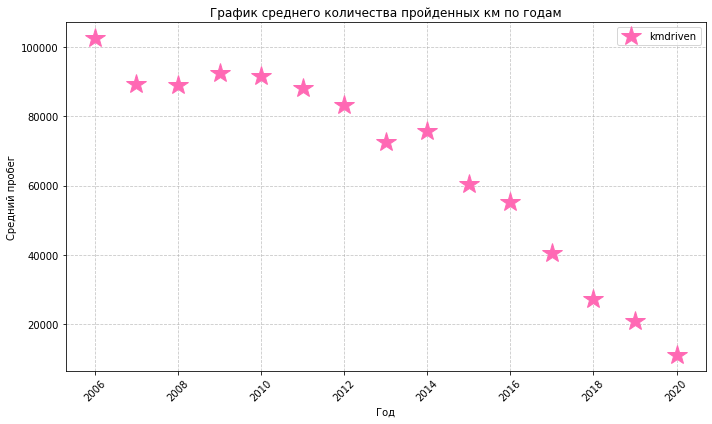

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[df['year'] > 2005]

pivot_avg_km = df_filtered.pivot_table(
    index='year',           
    values='kmdriven',      
    aggfunc='mean'          
).reset_index()             

plt.figure(figsize=(10, 6))

plt.plot(
    pivot_avg_km['year'],          
    pivot_avg_km['kmdriven'],      
    marker='*',                    
    linestyle='none',              
    color='#FF69B4',               
    markersize=20,                 
    label='kmdriven'
)

plt.title('График среднего количества пройденных км по годам')
plt.xlabel('Год')
plt.ylabel('Средний пробег')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

На графике представлено изменение среднего пробега автомобилей по годам выпуска, начиная с 2006 года. Видно, что с увеличением года выпуска средний пробег автомобилей закономерно снижается. Это обусловлено тем, что более новые автомобили эксплуатируются меньшее время и, соответственно, проезжают меньше километров.

В 2006 году средний пробег составлял около 100 000 км, что является максимальным значением на графике. К 2010–2012 годам средний пробег стабилизировался на уровне 85 000–90 000 км. С 2014 года наблюдается более выраженный спад — средний пробег снижается до 75 000 км в 2014 году, далее до 60 000 км в 2016 году, и к 2020 году достигает минимального значения — около 15 000 км.

Это подтверждает логическую связь: чем новее автомобиль, тем меньше он успел проехать за время своей эксплуатации. График наглядно демонстрирует тренд на снижение среднего пробега для новых моделей, что соответствует ожиданиям рынка подержанных автомобилей.

**Индивидуальное задание 3**

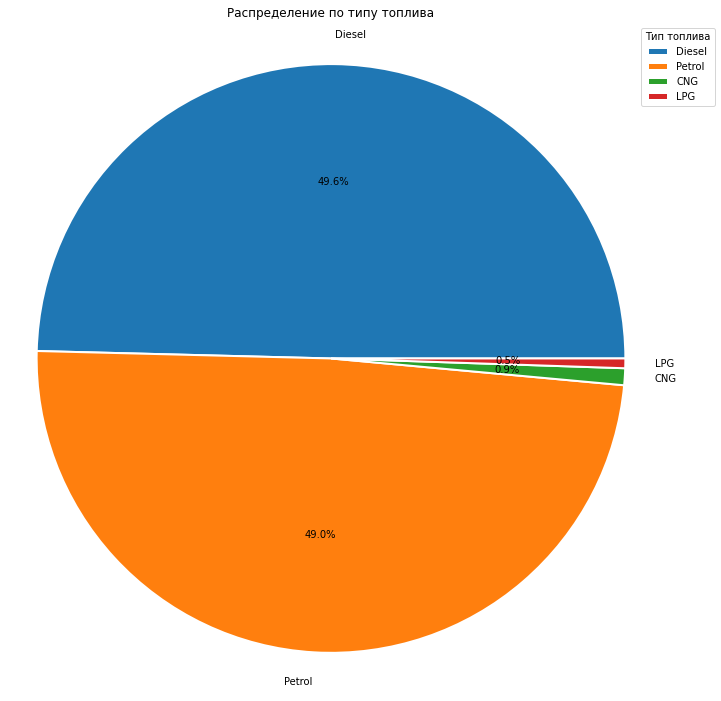

In [11]:
import matplotlib.pyplot as plt

fuel_counts = df['fuel'].value_counts()

fuel_counts_filtered = fuel_counts[fuel_counts > 1]

plt.figure(figsize=(10, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

wedges, texts, autotexts = plt.pie(
    fuel_counts_filtered.values,
    labels=fuel_counts_filtered.index,
    autopct='%1.1f%%',        
    colors=colors[:len(fuel_counts_filtered)],  
    startangle=0,            
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  
)


plt.title('Распределение по типу топлива')
plt.legend(wedges, fuel_counts_filtered.index, title="Тип топлива", loc="upper right", bbox_to_anchor=(1.1, 1))
plt.axis('equal')  
plt.tight_layout()
plt.show()

Круговая диаграмма отражает распределение автомобилей по типу топлива. Наиболее распространёнными являются два типа: Diesel и Petrol, на которые в сумме приходится 98,6% всех автомобилей — по 49,6% и 49,0% соответственно. Это указывает на доминирование бензиновых и дизельных двигателей на рынке подержанных автомобилей.
Остальные типы топлива — CNG и LPG — представлены в незначительных долях: 0,9% и 0,5% соответственно. Их совокупная доля не превышает 1,5%, что свидетельствует о крайне низкой популярности альтернативных видов топлива в данном сегменте рынка.
Типы топлива, встречающиеся единично, были исключены из диаграммы согласно условию задания. Это позволяет сосредоточиться на основных категориях, формирующих структуру рынка. В целом, распределение показывает высокую концентрацию на двух основных типах топлива, что характерно для большинства рынков подержанных автомобилей в условиях ограниченного спроса на экологически альтернативные решения.

**Задание 4**

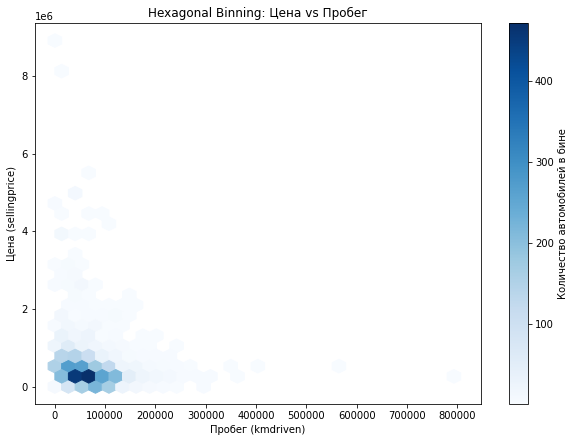

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.hexbin(df['kmdriven'], df['sellingprice'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Количество автомобилей в бине')
plt.xlabel('Пробег (kmdriven)')
plt.ylabel('Цена (sellingprice)')
plt.title('Hexagonal Binning: Цена vs Пробег')
plt.grid(False)
plt.show()

На графике Hexagonal Binning представлена плотность распределения автомобилей в пространстве «пробег (kmdriven) — цена (sellingprice)». Цветовая шкала отражает количество автомобилей в каждом шестиугольном бине: чем темнее синий цвет, тем больше автомобилей в данной области.

Основная концентрация точек наблюдается в области низкого пробега (до 150 000 км) и умеренной цены (до 2 млн). Это соответствует типичному сегменту рынка подержанных автомобилей — машины с относительно небольшим пробегом и доступной стоимостью. С увеличением пробега плотность точек снижается, что указывает на меньшее количество автомобилей с высоким пробегом.

В области высоких цен (выше 4 млн) и низкого пробега (до 50 000 км) наблюдается небольшая концентрация — это, вероятно, премиум-автомобили или редкие модели. В то же время, автомобили с высоким пробегом (>300 000 км) и высокой ценой практически отсутствуют — такая комбинация нехарактерна для рынка.

График наглядно демонстрирует отрицательную связь между пробегом и ценой: чем больше пробег, тем ниже цена, при этом основная масса сделок сосредоточена в нижней левой части графика. Это подтверждает общую рыночную закономерность: стоимость автомобиля снижается с увеличением его эксплуатации.

**Задание 5**

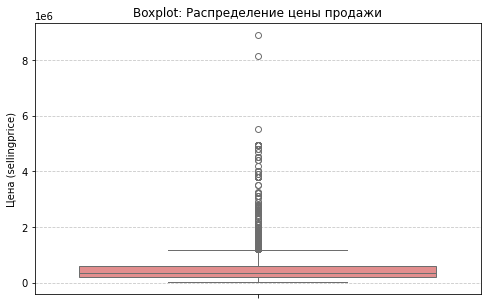

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['sellingprice'], color='lightcoral')
plt.title('Boxplot: Распределение цены продажи')
plt.ylabel('Цена (sellingprice)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На boxplot представлено распределение цены продажи (sellingprice). График демонстрирует сильную правосмещённость распределения: основная масса автомобилей сосредоточена в нижней части — медиана и первый квартиль находятся в диапазоне до 1 млн, а второй квартиль — до 2 млн. Верхняя граница ящика (третий квартиль) находится около 3 млн, что указывает на наличие значительного числа автомобилей среднего ценового сегмента.

Наблюдается большое количество выбросов в верхней части графика — точки выше 4 млн, вплоть до 8–9 млн. Это свидетельствует о наличии на рынке дорогих автомобилей (премиум-класс, редкие модели, новые подержанные), которые значительно превышают среднюю цену. Нижние выбросы отсутствуют — минимальная цена близка к нулю, но не выходит за пределы первого квартиля.

Распределение имеет длинный верхний «ус» и множество точек-выбросов, что подтверждает асимметричность данных. Это означает, что среднее значение цены будет существенно выше медианы из-за влияния дорогих автомобилей. Для анализа таких данных рекомендуется использовать медиану как меру центральной тенденции и учитывать выбросы при построении моделей прогнозирования.

**Задание 6**

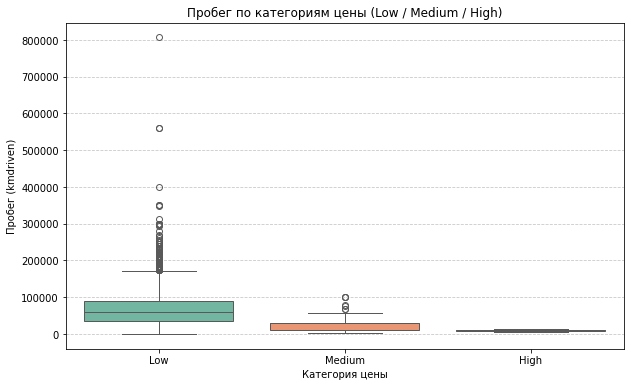

In [14]:
df['price_category'] = pd.cut(
    df['sellingprice'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_category', y='kmdriven', hue='price_category', palette='Set2', legend=False)
plt.title('Пробег по категориям цены (Low / Medium / High)')
plt.xlabel('Категория цены')
plt.ylabel('Пробег (kmdriven)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На boxplot представлено распределение пробега (kmdriven) в зависимости от категории цены (price_category), разделённой на три группы: Low, Medium, High. График наглядно демонстрирует обратную связь между ценовой категорией автомобиля и его пробегом.

В категории Low (низкая цена) медианный пробег находится на уровне около 80 000–100 000 км, а диапазон значений — от 20 000 до 300 000 км. Наличие выбросов выше 300 000 км указывает на наличие автомобилей с высоким пробегом в этом сегменте, что соответствует ожиданиям — дешёвые авто чаще имеют большой износ.

В категории Medium (средняя цена) медианный пробег снижается до 50 000–60 000 км, а разброс значений сужается — основная масса автомобилей имеет пробег до 100 000 км. Выбросы присутствуют, но их количество меньше, чем в категории Low.

В категории High (высокая цена) медианный пробег составляет менее 20 000 км, а диапазон значений крайне узкий — почти все автомобили имеют пробег до 50 000 км. Выбросов практически нет, что говорит о том, что дорогие автомобили на вторичном рынке — это преимущественно новые или малоезженные машины.

Таким образом, наблюдается чёткая закономерность: чем выше цена автомобиля, тем ниже его средний пробег. Это подтверждает гипотезу о том, что стоимость подержанного автомобиля обратно пропорциональна его эксплуатации. Категоризация цены позволяет выявить эту зависимость визуально и количественно.

**Задание 7**

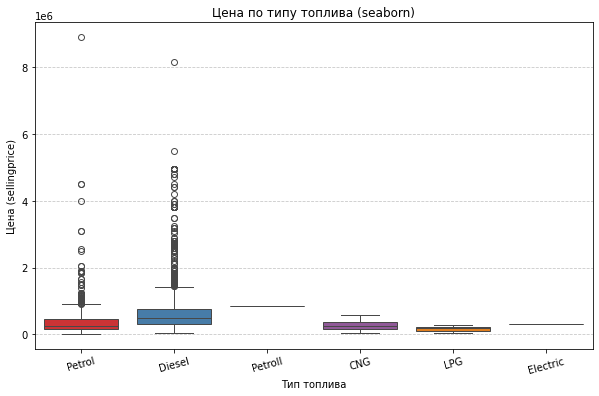

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel', y='sellingprice', hue='fuel', palette='Set1', legend=False)
plt.title('Цена по типу топлива (seaborn)')
plt.xlabel('Тип топлива')
plt.ylabel('Цена (sellingprice)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

На boxplot представлено распределение цены продажи (sellingprice) по типу топлива (fuel). График позволяет оценить влияние типа топлива на стоимость автомобиля.

Категория Petrol (бензин) имеет медианную цену около 1 млн, с широким разбросом значений — от низких до высоких (до 8–9 млн). Наличие множества выбросов указывает на то, что среди бензиновых автомобилей присутствуют как бюджетные модели, так и премиум-класс.

Категория Diesel (дизель) демонстрирует схожую медианную цену — около 1 млн, но с более узким межквартильным интервалом. Выбросы также присутствуют, однако их количество меньше, чем у бензиновых авто. Это может свидетельствовать о большей однородности дизельного сегмента по стоимости.

Категории CNG, LPG и Electric представлены в значительно меньшем количестве. У них очень узкие ящики и мало выбросов, что говорит об ограниченном спросе и небольшом объёме данных. Медианные значения для этих категорий ниже — около 0.5 млн или менее, за исключением некоторых выбросов в категории Electric, где наблюдаются отдельные дорогие модели.

Таким образом, тип топлива оказывает определённое влияние на цену: бензиновые и дизельные автомобили имеют схожие медианные цены, но различаются по разбросу и наличию премиум-сегмента. Альтернативные виды топлива представлены в нижнем ценовом диапазоне, что соответствует их меньшей популярности на рынке подержанных автомобилей.

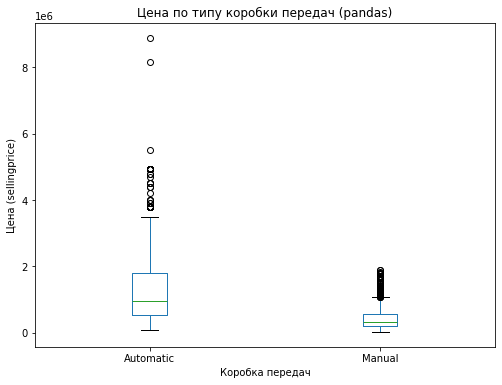

In [16]:
df.boxplot(column='sellingprice', by='transmission', figsize=(8, 6), grid=False)
plt.title('Цена по типу коробки передач (pandas)')
plt.suptitle('') 
plt.xlabel('Коробка передач')
plt.ylabel('Цена (sellingprice)')
plt.show()

На boxplot представлено распределение цены продажи (sellingprice) в зависимости от типа коробки передач (transmission). График наглядно демонстрирует различия в стоимости автомобилей с автоматической и механической трансмиссией.

Категория Automatic (автоматическая коробка) имеет медианную цену около 2.5 млн, при этом межквартильный интервал широкий — от 1.5 до 4 млн. Наличие множества выбросов выше 4 млн указывает на то, что среди автомобилей с автоматической коробкой встречаются как среднебюджетные, так и премиум-модели.

Категория Manual (механическая коробка) имеет значительно более низкую медианную цену — около 0.8 млн, а разброс значений узкий — основная масса автомобилей сосредоточена в диапазоне до 1.5 млн. Выбросов мало, и они не выходят за пределы 2 млн.

Таким образом, автомобили с автоматической коробкой передач в среднем стоят существенно дороже, чем с механической. Разница в медианных ценах составляет более 1.5 млн. Это подтверждает рыночную премию за автоматическую трансмиссию, которая сохраняется даже при сравнении автомобилей в одном ценовом сегменте. Механическая коробка характерна для бюджетных и экономичных моделей, тогда как автомат чаще встречается в автомобилях среднего и премиум-класса.

**Общий вывод по лабораторной работе**  
В ходе работы анализировался набор данных по подержанным автомобилям, содержащий информацию о годе выпуска, цене продажи, пробеге, типе топлива, коробке передач, размере компании, типе продавца и количестве предыдущих владельцев. Предварительная обработка включала проверку структуры данных, приведение типов данных float к типу int, приведение названий столбцов к нижнему регистру и фильтрацию по году выпуска (оставлены автомобили с 2006 года и новее). Категориальные признаки использовались для группировок, числовые — для построения распределений и оценки взаимосвязей.

Анализ показал, что рынок подержанных автомобилей доминируют машины с механической коробкой передач и бензиновыми/дизельными двигателями. Средняя цена автомобиля положительно коррелирует с годом выпуска (r = 0.41) и отрицательно — с пробегом (r = –0.19), хотя влияние пробега слабее, чем ожидалось. Наиболее сильная линейная связь наблюдается между годом выпуска и пробегом (r = –0.42): старые автомобили в среднем имеют больший пробег.

Группировка по типу владельца выявила, что подавляющее большинство автомобилей принадлежит первым владельцам, а доля автоматических коробок снижается с каждым последующим владельцем. Категоризация цены на три уровня (низкий, средний, высокий) подтвердила обратную зависимость между стоимостью и пробегом: дорогие автомобили почти всегда имеют пробег менее 50 000 км.

Сводные таблицы и визуализации (гистограммы, boxplot, heatmap, hexbin) согласованно указывают на то, что ключевые факторы цены — возраст автомобиля и тип трансмиссии, тогда как пробег играет второстепенную роль. Полученные закономерности отражают реальную рыночную структуру и могут быть использованы для построения моделей прогнозирования стоимости подержанных автомобилей.